In [79]:
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import math
import matplotlib.pyplot as plt
#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

#preprocessing 
from sklearn import preprocessing
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce


In [48]:
train = pd.read_csv('/Users/rahulsharma/Teams/c3cc8568-0-dataset/train.csv')
test = pd.read_csv('/Users/rahulsharma/Teams/c3cc8568-0-dataset/test.csv')
df = train.copy()
df_test = test.copy()

In [49]:
df.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...


In [23]:
df_test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf..."
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur..."
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...


In [25]:
gle = LabelEncoder()

In [59]:
df.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,10,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,5,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,0,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,7,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,3,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...


In [58]:
df_test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary
0,Te-1,8/18/2016,0,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...
1,Te-2,4/18/2016,7,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...
2,Te-3,3/23/2016,5,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf..."
3,Te-4,6/26/2017,15,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur..."
4,Te-5,5/13/2016,5,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...


In [60]:
train.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...


In [61]:
test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf..."
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur..."
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...


In [50]:
genre_labels = gle.fit_transform(df['Transaction-Type'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [51]:
df['Transaction-Type'] = df['Transaction-Type'].map(inv_map) 
inv_map

{'Bank account or service': 0,
 'Checking or savings account': 1,
 'Consumer Loan': 2,
 'Credit card': 3,
 'Credit card or prepaid card': 4,
 'Credit reporting': 5,
 'Credit reporting, credit repair services, or other personal consumer reports': 6,
 'Debt collection': 7,
 'Money transfer, virtual currency, or money service': 8,
 'Money transfers': 9,
 'Mortgage': 10,
 'Other financial service': 11,
 'Payday loan': 12,
 'Payday loan, title loan, or personal loan': 13,
 'Prepaid card': 14,
 'Student loan': 15,
 'Vehicle loan or lease': 16,
 'Virtual currency': 17}

In [53]:
df_test['Transaction-Type'] = df_test['Transaction-Type'].map(inv_map)

In [55]:
df_test['Transaction-Type'].value_counts()

7     4539
10    3324
5     2986
3     1752
0     1385
6     1362
15    1188
2      860
4      293
1      196
12     169
14     127
9      121
16      88
13      64
8       57
11      31
17       1
Name: Transaction-Type, dtype: int64

In [56]:
df['Transaction-Type'].value_counts()

7     10422
10     7950
5      6706
3      4119
0      3264
6      3169
15     2874
2      2033
4       719
1       496
12      363
9       332
14      308
16      155
8       147
13      145
11       60
17        4
Name: Transaction-Type, dtype: int64

In [57]:
inv_map

{'Bank account or service': 0,
 'Checking or savings account': 1,
 'Consumer Loan': 2,
 'Credit card': 3,
 'Credit card or prepaid card': 4,
 'Credit reporting': 5,
 'Credit reporting, credit repair services, or other personal consumer reports': 6,
 'Debt collection': 7,
 'Money transfer, virtual currency, or money service': 8,
 'Money transfers': 9,
 'Mortgage': 10,
 'Other financial service': 11,
 'Payday loan': 12,
 'Payday loan, title loan, or personal loan': 13,
 'Prepaid card': 14,
 'Student loan': 15,
 'Vehicle loan or lease': 16,
 'Virtual currency': 17}

In [62]:
genre_labels = gle.fit_transform(df['Complaint-reason'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [64]:
df['Complaint-reason'] = df['Complaint-reason'].map(inv_map) 

In [66]:
df_test['Complaint-reason'] = df_test['Complaint-reason'].map(inv_map) 

In [74]:
df_test['Complaint-reason']

0          1.0
1         33.0
2         71.0
3         49.0
4         71.0
5          1.0
6        130.0
7         71.0
8        137.0
9        105.0
10       138.0
11         9.0
12        76.0
13        71.0
14        18.0
15        33.0
16        78.0
17       121.0
18        48.0
19        72.0
20        71.0
21        33.0
22        76.0
23        36.0
24        78.0
25         9.0
26        71.0
27        84.0
28        14.0
29        27.0
         ...  
18513     55.0
18514    130.0
18515     51.0
18516     81.0
18517     48.0
18518     72.0
18519    107.0
18520     71.0
18521    117.0
18522     71.0
18523      1.0
18524     78.0
18525      1.0
18526    118.0
18527    133.0
18528     72.0
18529    130.0
18530    123.0
18531     78.0
18532      1.0
18533     82.0
18534     71.0
18535     85.0
18536     48.0
18537     40.0
18538     65.0
18539     71.0
18540    131.0
18541     78.0
18542     52.0
Name: Complaint-reason, Length: 18543, dtype: float64

In [70]:
genre_labels = gle.fit_transform(df['Company-response'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [96]:
df['Company-response'] = train['Company-response']
df_test['Company-response'] = test['Company-response']

In [97]:
inv_map = {'Nan': None,
 'Company believes complaint caused principally by actions of third party outside the control or direction of the company': 1,
 'Company believes complaint is the result of an isolated error': 2,
 'Company believes complaint relates to a discontinued policy or procedure': 3,
 'Company believes complaint represents an opportunity for improvement to better serve consumers': 4,
 'Company believes it acted appropriately as authorized by contract or law': 5,
 'Company believes the complaint is the result of a misunderstanding': 6,
 "Company can't verify or dispute the facts in the complaint": 7,
 'Company chooses not to provide a public response': 8,
 'Company disputes the facts presented in the complaint': 9,
 'Company has responded to the consumer and the CFPB and chooses not to provide a public response': 10}

In [98]:
df['Company-response'] = df['Company-response'].map(inv_map)

In [99]:
df['Company-response'].value_counts()

10.0    10928
8.0      4322
5.0      3811
6.0       387
9.0       379
2.0       302
1.0       300
7.0       166
4.0       160
3.0         5
Name: Company-response, dtype: int64

In [100]:
df_test['Company-response'] = df_test['Company-response'].map(inv_map)

In [102]:
mean_value= math.floor(df['Company-response'].mean())
mean_value

8.0

In [104]:
df['Company-response']=df['Company-response'].fillna(mean_value)

In [106]:
df['Company-response'].value_counts()

8.0     26828
10.0    10928
5.0      3811
6.0       387
9.0       379
2.0       302
1.0       300
7.0       166
4.0       160
3.0         5
Name: Company-response, dtype: int64

In [107]:
train['Company-response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            10928
Company chooses not to provide a public response                                                                            4322
Company believes it acted appropriately as authorized by contract or law                                                    3811
Company believes the complaint is the result of a misunderstanding                                                           387
Company disputes the facts presented in the complaint                                                                        379
Company believes complaint is the result of an isolated error                                                                302
Company believes complaint caused principally by actions of third party outside the control or direction of the company      300
Company can't verify or dispute the facts in the complaint                                       

In [108]:
df_test['Company-response'].value_counts()

10.0    4695
8.0     1827
5.0     1598
6.0      181
9.0      158
1.0      134
2.0      114
7.0       69
4.0       64
3.0        2
Name: Company-response, dtype: int64

In [110]:
mean_value= math.floor(df_test['Company-response'].mean())
mean_value

8.0

In [111]:
df_test['Company-response']=df_test['Company-response'].fillna(mean_value)

In [112]:
genre_labels = gle.fit_transform(df['Consumer-disputes'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [113]:
inv_map

{nan: 7697, 'No': 7698, 'Yes': 7699}

In [116]:
inv_map = {'NaN': None, 'No': 0, 'Yes': 1}

In [117]:
df['Consumer-disputes'] = df['Consumer-disputes'].map(inv_map)

In [118]:
df['Consumer-disputes'].value_counts()

0.0    27663
1.0     7905
Name: Consumer-disputes, dtype: int64

In [120]:
mean_value= math.floor(df['Consumer-disputes'].mean())
mean_value

0.0

In [121]:
df['Consumer-disputes']=df['Consumer-disputes'].fillna(mean_value)

In [122]:
df_test['Consumer-disputes'] = df_test['Consumer-disputes'].map(inv_map)

In [123]:
mean_value= math.floor(df_test['Consumer-disputes'].mean())
mean_value

0.0

In [124]:
df_test['Consumer-disputes']=df_test['Consumer-disputes'].fillna(mean_value)

In [138]:
genre_labels = gle.fit_transform(df['Consumer-complaint-summary'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [140]:
df['Consumer-complaint-summary'] = df['Consumer-complaint-summary'].map(inv_map)

In [142]:
df['Consumer-complaint-summary'].value_counts()

10466    13
6853     13
10476     7
36577     6
36578     6
7461      5
15253     5
15305     4
36576     4
10454     4
10589     4
417       3
34807     3
31629     3
6612      3
7467      3
23992     3
39587     3
21528     3
14223     3
18005     3
7651      3
18056     3
37361     3
23970     3
15633     3
34799     3
14912     3
29678     2
36654     2
         ..
37479     1
39526     1
33381     1
35428     1
41569     1
21087     1
23134     1
16989     1
19036     1
27256     1
25209     1
31354     1
37511     1
6806      1
661       1
2708      1
12947     1
14994     1
8849      1
10896     1
39558     1
29307     1
33413     1
35460     1
41601     1
21119     1
23166     1
17021     1
19068     1
0         1
Name: Consumer-complaint-summary, Length: 43022, dtype: int64

In [143]:
df_test['Consumer-complaint-summary'] = df_test['Consumer-complaint-summary'].map(inv_map)

In [145]:
df_test.isnull().sum()

Complaint-ID                      0
Date-received                     0
Transaction-Type                  0
Complaint-reason                  3
Company-response                  0
Date-sent-to-company              0
Consumer-disputes                 0
Consumer-complaint-summary    18365
dtype: int64

In [136]:
df['Consumer-complaint-summary'].value_counts().sort_index()

"... During the last seven or eight months, I tried to remedy this problem on my own, but to no avail I have sent to TRANS UNION, through the certified mail by the USPS, four (4) letters of disputes informing them they are illegally listing unverified accounts on my credit report by mistake.\n\nI requested that the adverse accounts be removed from my file. However, they did not comply. The list of accounts in question has severely impacted my life negatively, causing serious personal and financial difficulties. I have suffered significant damage to my credit, my credit limits have been reduced and I have even been refused to obtain additional financing. "                                                                                                                                                                                                                                                                                                                                                 

In [146]:
genre_labels = gle.fit_transform(test['Complaint-reason'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [147]:
inv_map

{'APR or interest rate': 0,
 'Account opening, closing, or management': 1,
 'Adding money': 2,
 'Advertising and marketing': 3,
 'Advertising and marketing, including promotional offers': 4,
 'Advertising, marketing or disclosures': 5,
 'Application processing delay': 6,
 'Application, originator, mortgage broker': 7,
 'Applied for loan/did not receive money': 8,
 'Applying for a mortgage': 9,
 'Applying for a mortgage or refinancing an existing mortgage': 10,
 'Arbitration': 11,
 'Attempts to collect debt not owed': 12,
 'Balance transfer': 13,
 'Balance transfer fee': 14,
 'Bankruptcy': 15,
 'Billing disputes': 16,
 'Billing statement': 17,
 "Can't contact lender": 18,
 "Can't contact lender or servicer": 19,
 "Can't repay my loan": 20,
 "Can't stop charges to bank account": 21,
 "Can't stop withdrawals from your bank account": 22,
 'Cash advance': 23,
 'Cash advance fee': 24,
 'Charged bank acct wrong day or amt': 25,
 "Charged fees or interest I didn't expect": 26,
 "Charged fees o

In [148]:
genre_labels = gle.fit_transform(train['Complaint-reason'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [149]:
inv_map

{'APR or interest rate': 0,
 'Account opening, closing, or management': 1,
 'Account terms and changes': 2,
 'Adding money': 3,
 'Advertising': 4,
 'Advertising and marketing': 5,
 'Advertising and marketing, including promotional offers': 6,
 'Advertising, marketing or disclosures': 7,
 'Application processing delay': 8,
 'Application, originator, mortgage broker': 9,
 'Applied for loan/did not receive money': 10,
 'Applying for a mortgage': 11,
 'Applying for a mortgage or refinancing an existing mortgage': 12,
 'Arbitration': 13,
 'Attempts to collect debt not owed': 14,
 'Balance transfer': 15,
 'Balance transfer fee': 16,
 'Bankruptcy': 17,
 'Billing disputes': 18,
 'Billing statement': 19,
 "Can't contact lender": 20,
 "Can't contact lender or servicer": 21,
 "Can't repay my loan": 22,
 "Can't stop charges to bank account": 23,
 'Cash advance': 24,
 'Cash advance fee': 25,
 'Charged bank acct wrong day or amt': 26,
 "Charged fees or interest I didn't expect": 27,
 "Charged fees o

In [151]:
df.isnull().sum()

Complaint-ID                  0
Date-received                 0
Transaction-Type              0
Complaint-reason              0
Company-response              0
Date-sent-to-company          0
Complaint-Status              0
Consumer-disputes             0
Consumer-complaint-summary    0
dtype: int64

In [152]:
df_test.isnull().sum()

Complaint-ID                      0
Date-received                     0
Transaction-Type                  0
Complaint-reason                  3
Company-response                  0
Date-sent-to-company              0
Consumer-disputes                 0
Consumer-complaint-summary    18365
dtype: int64

In [153]:
mean_value= math.floor(df_test['Complaint-reason'].mean())
mean_value

64.0

In [156]:
df_test['Complaint-reason']=df_test['Complaint-reason'].fillna(mean_value)

In [157]:
df_test.isnull().sum()

Complaint-ID                      0
Date-received                     0
Transaction-Type                  0
Complaint-reason                  0
Company-response                  0
Date-sent-to-company              0
Consumer-disputes                 0
Consumer-complaint-summary    18365
dtype: int64

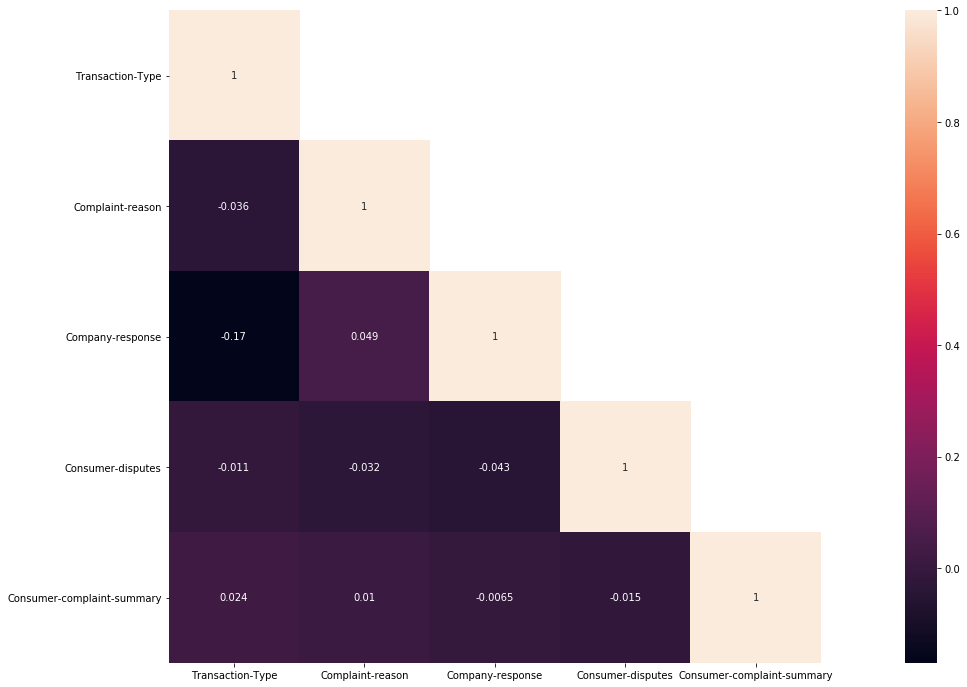

In [158]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [159]:
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df['Date-received'])]
df["month"] = [t.month for t in pd.DatetimeIndex(df['Date-received'])]
df['year'] = [t.year for t in pd.DatetimeIndex(df['Date-received'])]

In [160]:
df['year'] = df['year'].map({2015:0, 2016:1, 2017:2})

In [161]:
df["day-comp"] = [t.dayofweek for t in pd.DatetimeIndex(df['Date-sent-to-company'])]
df["month-comp"] = [t.month for t in pd.DatetimeIndex(df['Date-sent-to-company'])]
df['year-com'] = [t.year for t in pd.DatetimeIndex(df['Date-sent-to-company'])]

In [162]:
df['year-com'] = df['year-com'].map({2015:0, 2016:1, 2017:2})

In [163]:
df_test["day"] = [t.dayofweek for t in pd.DatetimeIndex(df_test['Date-received'])]
df_test["month"] = [t.month for t in pd.DatetimeIndex(df_test['Date-received'])]
df_test['year'] = [t.year for t in pd.DatetimeIndex(df_test['Date-received'])]

In [164]:
df_test['year'] = df_test['year'].map({2015:0, 2016:1, 2017:2})

In [165]:
df_test["day-comp"] = [t.dayofweek for t in pd.DatetimeIndex(df_test['Date-sent-to-company'])]
df_test["month-comp"] = [t.month for t in pd.DatetimeIndex(df_test['Date-sent-to-company'])]
df_test['year-com'] = [t.year for t in pd.DatetimeIndex(df_test['Date-sent-to-company'])]

In [166]:
df_test['year-com'] = df_test['year-com'].map({2015:0, 2016:1, 2017:2})

In [189]:
df.drop({'Consumer-complaint-summary'},axis=1,inplace=True)
df_test.drop({'Consumer-complaint-summary'},axis=1,inplace=True)

In [168]:
df.head()

,Complaint-ID,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,day,month,year,day-comp,month-comp,year-com
0,Tr-1,10,78,8.0,Closed with explanation,1.0,32712,2,11,0,2,11,0
1,Tr-2,5,71,8.0,Closed with non-monetary relief,0.0,39918,1,7,0,1,7,0
2,Tr-3,0,145,8.0,Closed with explanation,0.0,5429,3,5,0,3,5,0
3,Tr-4,7,36,5.0,Closed with explanation,0.0,35360,5,11,1,5,11,1
4,Tr-5,3,100,10.0,Closed with explanation,0.0,22874,3,9,1,3,9,1


In [175]:
genre_labels = gle.fit_transform(train['Complaint-Status'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [177]:
df['Complaint-Status'] = df['Complaint-Status'].map(inv_map)

In [ ]:
df

In [194]:
x_train,x_test,y_train,y_test=train_test_split(df.drop({'Complaint-Status','Complaint-ID'},axis=1),df['Complaint-Status'],test_size=0.3,random_state=42)

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.29384235028083083,
  0.2864585946051171,
  0.2934441001732857,
  0.26861251168907163,
  0.2875683581108311]}

In [191]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [196]:
n_neighbors = []
for i in range(0,50,5):
    if(i!=0):
        n_neighbors.append(i)
        
params_dict = {'n_neighbors':n_neighbors, 'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params_dict, scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train, y_train)
pred= clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.26511522076225114


In [197]:
pred=clf_knn.predict(df_test.drop({'Complaint-ID'}, axis=1))
d={'Complaint-ID':test['Complaint-ID'],'Complaint-Status':pred}
ans=pd.DataFrame(d)
ans

,Complaint-ID,Complaint-Status
0,Te-1,1.866667
1,Te-2,1.244444
2,Te-3,1.244444
3,Te-4,1.133333
4,Te-5,1.800000
5,Te-6,2.022222
6,Te-7,1.200000
7,Te-8,1.222222
8,Te-9,1.555556
9,Te-10,1.200000


In [200]:
temp = ans['Complaint-Status']

In [204]:
df['Complaint-Status'].value_counts()

1    34300
3     5018
2     2818
0      809
4      321
Name: Complaint-Status, dtype: int64

In [202]:
df_test.shape

(18543, 11)

In [210]:
temp = df['Company-response']

In [212]:
temp = temp.astype(int)

In [215]:
df.head()

,Complaint-ID,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes,day,month,year,day-comp,month-comp,year-com
0,Tr-1,10,78,8.0,1,1.0,2,11,0,2,11,0
1,Tr-2,5,71,8.0,3,0.0,1,7,0,1,7,0
2,Tr-3,0,145,8.0,1,0.0,3,5,0,3,5,0
3,Tr-4,7,36,5.0,1,0.0,5,11,1,5,11,1
4,Tr-5,3,100,10.0,1,0.0,3,9,1,3,9,1


In [219]:
df['Company-response'] = df['Company-response'].astype(int)
df['Consumer-disputes'] = df['Consumer-disputes'].astype(int)                                      

In [220]:
df.head()

,Complaint-ID,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes,day,month,year,day-comp,month-comp,year-com
0,Tr-1,10,78,8,1,1,2,11,0,2,11,0
1,Tr-2,5,71,8,3,0,1,7,0,1,7,0
2,Tr-3,0,145,8,1,0,3,5,0,3,5,0
3,Tr-4,7,36,5,1,0,5,11,1,5,11,1
4,Tr-5,3,100,10,1,0,3,9,1,3,9,1


In [221]:
df_test.head()

,Complaint-ID,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,day,month,year,day-comp,month-comp,year-com
0,Te-1,0,1.0,10.0,0.0,3,8,1,3,8,1
1,Te-2,7,33.0,5.0,0.0,0,4,1,2,4,1
2,Te-3,5,71.0,8.0,0.0,2,3,1,2,3,1
3,Te-4,15,49.0,8.0,0.0,0,6,2,0,6,2
4,Te-5,5,71.0,10.0,0.0,4,5,1,4,5,1


In [222]:
df_test['Company-response'] = df_test['Company-response'].astype(int)
df_test['Consumer-disputes'] = df_test['Consumer-disputes'].astype(int)   
df_test['Complaint-reason'] = df_test['Complaint-reason'].astype(int)   

In [223]:
df_test.head()

,Complaint-ID,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,day,month,year,day-comp,month-comp,year-com
0,Te-1,0,1,10,0,3,8,1,3,8,1
1,Te-2,7,33,5,0,0,4,1,2,4,1
2,Te-3,5,71,8,0,2,3,1,2,3,1
3,Te-4,15,49,8,0,0,6,2,0,6,2
4,Te-5,5,71,10,0,4,5,1,4,5,1


In [226]:
x_train,x_test,y_train,y_test=train_test_split(df.drop({'Complaint-Status', 'Complaint-ID'},axis=1),df['Complaint-Status'],test_size=0.3,random_state=42)

In [227]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.29349577580299613,
  0.2869279272636538,
  0.293660427794611,
  0.26861251168907163,
  0.2875683581108311]}

In [228]:
no_of_test = [500]
params_dict = {'n_estimators':no_of_test, 'n_jobs':[-1], 'max_features':['auto', 'sqrt', 'log2']}
clf_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='neg_mean_squared_log_error')
clf_rfr.fit(x_train,y_train)
pred = clf_rfr.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.2834508090930881


In [229]:
n_neighbors = []
for i in range(0,50,5):
    if(i!=0):
        n_neighbors.append(i)
        
params_dict = {'n_neighbors':n_neighbors, 'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params_dict, scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train, y_train)
pred= clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.26511522076225114


In [232]:
pred=clf_knn.predict(df_test.drop({'Complaint-ID'}, axis=1))
d={'Complaint-ID':test['Complaint-ID'],'Complaint-Status':pred}
ans=pd.DataFrame(d)
ans.to_csv('Complaint Status Tracking.csv',index=False)
ans

,Complaint-ID,Complaint-Status
0,Te-1,1.866667
1,Te-2,1.244444
2,Te-3,1.244444
3,Te-4,1.133333
4,Te-5,1.800000
5,Te-6,2.022222
6,Te-7,1.200000
7,Te-8,1.222222
8,Te-9,1.555556
9,Te-10,1.200000


In [235]:
ans['Complaint-Status'].value_counts().sort_index()

0.866667      5
0.888889      1
0.911111      9
0.933333     40
0.955556     48
0.977778    172
1.000000    317
1.022222    302
1.044444    711
1.066667    474
1.088889    696
1.111111    608
1.133333    751
1.155556    648
1.177778    883
1.200000    713
1.222222    897
1.244444    702
1.266667    941
1.288889    702
1.311111    861
1.333333    716
1.355556    854
1.377778    604
1.400000    784
1.422222    521
1.444444    656
1.466667    374
1.488889    543
1.511111    327
           ... 
1.555556    237
1.577778    385
1.600000    139
1.622222    250
1.644444    120
1.666667    245
1.688889     54
1.711111    225
1.733333     46
1.755556    120
1.777778     23
1.800000     73
1.822222     17
1.844444     71
1.866667     25
1.888889     55
1.911111      6
1.933333     18
1.955556      2
1.977778     20
2.000000     11
2.022222     15
2.044444     15
2.066667      2
2.088889      1
2.133333      6
2.155556      8
2.200000      2
2.222222      4
2.288889      2
Name: Complaint-Status, 

In [239]:
ans['Complaint-Status'] = ans['Complaint-Status'].astype(int)

In [243]:
ans.to_csv('Complaint-Status-Tracking.csv',index=False)

In [246]:
ans['Complaint-Status'].value_counts()

1    18202
0      275
2       66
Name: Complaint-Status, dtype: int64

In [244]:
genre_labels = gle.fit_transform(train['Complaint-Status'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

In [248]:
genre_mappings

{0: 'Closed',
 1: 'Closed with explanation',
 2: 'Closed with monetary relief',
 3: 'Closed with non-monetary relief',
 4: 'Untimely response'}

In [249]:
ans['Complaint-Status'] = ans['Complaint-Status'].map(genre_mappings)

In [250]:
ans

,Complaint-ID,Complaint-Status
0,Te-1,Closed with explanation
1,Te-2,Closed with explanation
2,Te-3,Closed with explanation
3,Te-4,Closed with explanation
4,Te-5,Closed with explanation
5,Te-6,Closed with monetary relief
6,Te-7,Closed with explanation
7,Te-8,Closed with explanation
8,Te-9,Closed with explanation
9,Te-10,Closed with explanation


In [251]:
ans.to_csv('Complaint--Status--Tracking.csv',index=False)